# Вычислительная математика. Домашняя лабораторная работа №3. Тема: "Нелинейные уравнения".
## Выполнил: Хайдари Фарид, группа Б01-909.
## Номер: IV.12.7

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from typing import Iterable

EPS = 1e-5 # заданная точность

## Рассмотрим как выглядит пересечение двух заданных кривых

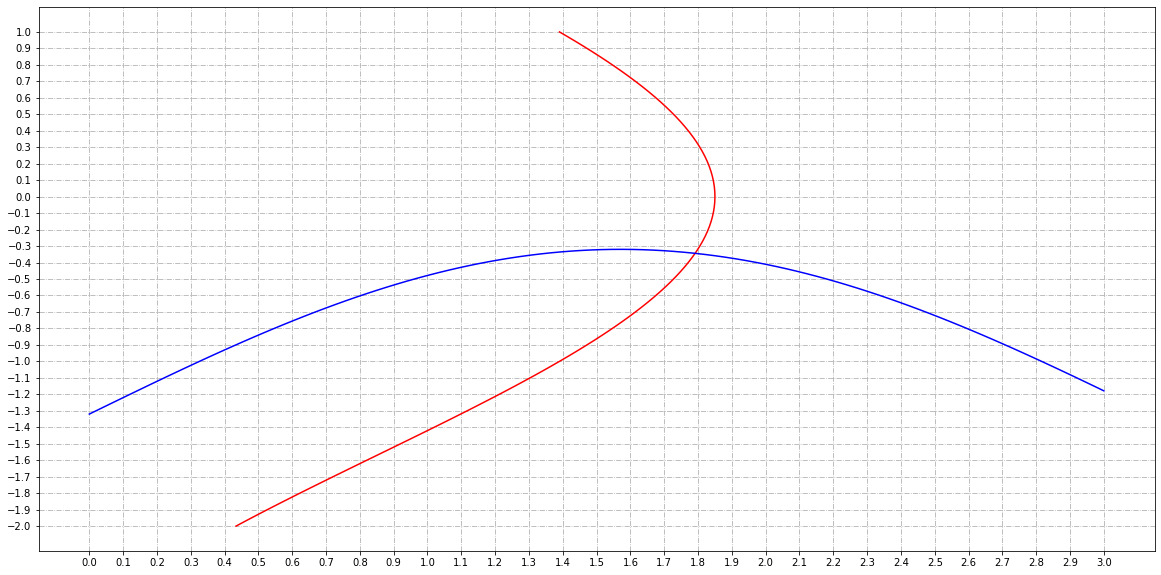

In [70]:
xArg = np.linspace(0, 3, 100)
yArg = np.linspace(-2, 1, 100)

xTicks = np.linspace(0, 3, 31)
yTicks = np.linspace(-2, 1, 31)

x = 0.85 + np.cos(yArg)
y = -1.32 + np.sin(xArg)

plt.figure(figsize=(20, 10))
plt.plot(x, yArg, 'r')
plt.plot(xArg, y, 'b')

plt.xticks(xTicks)
plt.yticks(yTicks)
plt.grid(linestyle='-.')
plt.show()

## Рассмотрим область:
$$
x \in [1.7, 1.9],\: y \in [-0.4, -0.4]
$$
## Рассмотрим в том числе на графике

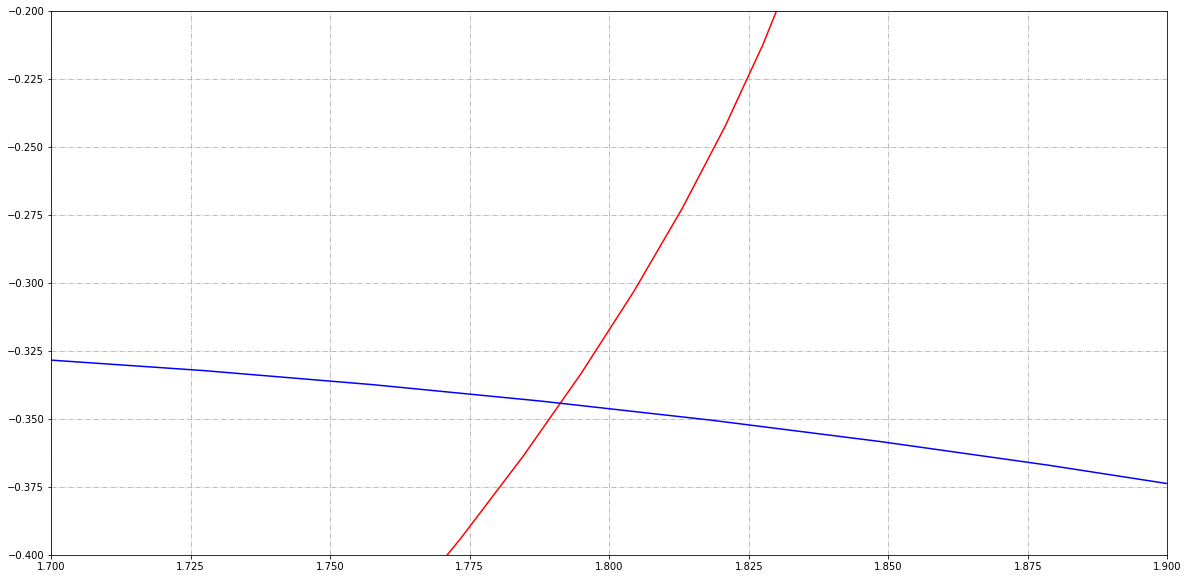

In [71]:
plt.figure(figsize=(20, 10))
plt.plot(x, yArg, 'r')
plt.plot(xArg, y, 'b')

# Приблизим
plt.xlim((1.7, 1.9))
plt.ylim((-0.4, -0.2))

plt.grid(linestyle='-.')
plt.show()

## Приведем к необходимому для МПИ виду:
$$
\left\lbrace
\begin{matrix}
  x = 0.85 + \cos(y)  \\
  y = -1.32 + \sin(x) \\
\end{matrix}
\right.
$$
## Найдем матрицу Якоби:
$$
J = \left(
\begin{matrix}
  0      & -\sin(y) \\
  cos(x) & 0        \\
\end{matrix}
\right)
$$
## Из заданной нами ранее области имеем:
$$
\begin{matrix}
  | -\sin(y) | \le \sin(0.4) \approx 0.38942 \\
  | \cos(x) | \le | \cos(1.9) | \approx 0.32329 \\
\end{matrix}
\Rightarrow ||J|| < 1
$$
## Т.о. МПИ сходится

## Определим функции для МПИ

In [72]:
def FPI(f:Callable[[Iterable], Iterable], u0:Iterable, eps:float): # МПИ - fixed-point iteration
  u = u0
  uPrev = [0 for x in u]
  iterNum = 0

  while any(abs(x - xPrev) >= eps for x, xPrev in zip(u, uPrev)):
    iterNum += 1
    uPrev = u
    u = f(u)

  return iterNum, u

def func(u:Iterable):
  res = [
    0.85 + np.cos(u[1]),
    -1.32 + np.sin(u[0])
  ]
  return res

In [73]:
iterNum, res = FPI(func, [1.8, -0.3], EPS)

print(f'Ответ: [x, y] = {res}')
print(f'Количество итераций: {iterNum}')

Ответ: [x, y] = [1.7913388724813675, -0.34421976363320883]
Количество итераций: 8
